# Files and Folders Pattern Matching Script

In [1]:
# import libraries
from datetime import datetime
import os
import re
import random
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# v3 with folder name pattern-matching
# traverse directory for files and folders
class FilesAndFoldersInDirectory:
    def __init__(self, directory_path, folder_name, folder_pattern, file_name, pattern, limit):
        """
        Initializes evaluator with directory from which to traverse, requires a folder name and regex pattern, 
        a file name and regex pattern, and a limit to stop the search.
        """
        self.directory_path = directory_path              # directory path
        self.folder_name = folder_name                    # description of folder being searched
        self.folder_pattern = re.compile(folder_pattern)  # compile folder regex pattern
        self.file_name = file_name                        # description of file being searched
        self.pattern = re.compile(pattern)                # compile file regex pattern
        self.limit = limit                                # limit: 100, 1000, 10000, etc.
        self.today = datetime.now().strftime("%Y-%m-%d")  # today's date
        self.grouped_folders = defaultdict(list)          # initialize instance variable for storing folder groups

    # function #1
    def retrieve_pattern_matched_files(self):
        pdf_files = []
        count = 0
        for root, dirs, files in os.walk(self.directory_path):
            if self.folder_pattern.search(root):                       # search dir for pattern-matched folder
                for file in files:                                     # for each file
                    if self.pattern.match(file):                       # match pattern
                        pdf_files.append(os.path.join(file))           # append matched file to list
                        count += 1                                     # update counter
                        if count == self.limit:                        # break if counter equal to limit
                            break

            if count == self.limit:
                break

        print(f"A total of {len(pdf_files)} retrieved {self.file_name} files from {self.folder_name} on {self.today}")

        random_sample_size = min(10, len(pdf_files))
        random_pdfs = random.sample(pdf_files, random_sample_size)

        print("\nRandomly selected samples:")
        for pdf in random_pdfs:
            print(pdf)

    # function #2 
    def distribution_of_files_in_folders(self):
        pdf_files = []
        folder_pdf_count = {}
        total_count = 0
        total_submissions_folders = 0                                  # counter for "Submissions" folders

        for root, dirs, files in os.walk(self.directory_path):         # Traverse directory structure
            if self.folder_pattern.search(root):                       # search dir for pattern-matched folder
                total_submissions_folders += 1                         # Increment count for every "Submissions" folder
                matched_count = 0                                      # Counter for current 'Submissions' folder

                for file in files:                                     # For each file in the folder
                    if self.pattern.match(file):                            # If the file matches the regex pattern
                        pdf_files.append(os.path.join(root, file))     # Append the matched file's full path to the list
                        matched_count += 1                             # Increment the count for the current folder
                        total_count += 1                               # Increment the global count

                        if total_count == self.limit:                       # break if counter equal to limit
                            break

                folder_pdf_count[root] = matched_count                 # store count of matched PDFs for folder even if 0

            if total_count == self.limit:                                   # break if counter equal to limit
                break

        # group folders by matching number of pdfs
        self.grouped_folders = defaultdict(list) 

        for folder, count in folder_pdf_count.items():
            self.grouped_folders[count].append(folder)

        df = pd.DataFrame(list(folder_pdf_count.items()), columns=['Folder', 'PDF_Count']) # refactor data in pandas df

        counts, bins = np.histogram(df['PDF_Count'], bins=range(df['PDF_Count'].max() + 2)) # histogram data

        palette = sns.color_palette('colorblind', len(counts)) # sns colour blind palette 

        plt.figure(figsize=(10, 6)) # create bar plot
        plt.bar(bins[:-1], counts, width=1, edgecolor='black', color=palette, align='edge')
        plt.xticks(ticks=bins[:-1] + 0.5, labels=range(df['PDF_Count'].max() + 1)) # center xticks
        plt.title(f"Distribution of '{self.file_name}' in '{self.folder_name}' folders", fontsize=16)
        plt.xlabel("Number of files")
        plt.ylabel("Number of folders")
        plt.grid(False)
        plt.show()

        print(f"A total of {total_submissions_folders} {self.folder_name} folders within the directory on {self.today}\n")

        print(f"The distribution of files in those folders:") # grouped results
        for count, folders in sorted(self.grouped_folders.items()):
            print(f"{len(folders)} folders with {count} {self.file_name}") 

    # function #3
    def show_files_in_random_folder(self, frequency):
        # Part to randomly select a folder with X "bid proposals" and print file names
        if frequency in self.grouped_folders:
            random_folder = random.choice(self.grouped_folders[frequency])  # select random folder with "X bid proposals"
            print(f"Randomly selected folder with {frequency} {self.file_name}: \n\n{random_folder}\n")

            for file in os.listdir(random_folder): # extract and print just filenames in folder
                if self.pattern.match(file):  # match files with the given pattern
                    print(file) 
        else:
            print(f"No folder with exactly {frequency} {self.file_name} found.") 

## Commercial Group - Eastern Hemisphere Bids Directory
### [Link to CG-EH directory where analysis performed](https://oceaneering.sharepoint.com/sites/OPG_CommEastern/Shared%20Documents/Forms/AllItems.aspx?id=%2Fsites%2FOPG%5FCommEastern%2FShared%20Documents%2FBIDS&viewid=26e7f20f%2D0e95%2D47c1%2Db83a%2De27464c76787)

### Pattern: "20XX-" "Anything.pdf"

In [2]:
# set global variables
file_name='Bid proposals.pdf'

# set EH variables 
bids_directory = "C:\\Users\\DCarlier\\Oceaneering\\Commercial Group - Eastern Hemisphere - Team Documents\\BIDS"
folder_name='Submissions'
folder_pattern = re.compile(r"submission", re.IGNORECASE)
file_pattern = re.compile(r"^20\d{2}-.*\.pdf$", re.IGNORECASE)

# instantiate evaluator class
evaluator = FilesAndFoldersInDirectory( 
    directory_path=bids_directory,                           # travesrse entire directory
    folder_name=folder_name,                                 # find folders like this
    folder_pattern=folder_pattern,                           # folder pattern-matching
    file_name=file_name,                                     # find files like this
    pattern=file_pattern,                                    # file pattern-matching
    limit=10000)                                             # limit result to 10K

### Total count and 10 random file samples

In [3]:
evaluator.retrieve_pattern_matched_files()

A total of 5888 retrieved Bid proposals.pdf files from Submissions on 2024-09-28

Randomly selected samples:
2023-013390 Tree cap unlocking jacks.pdf
2022-008716-001.pdf
2021-3539100-002.pdf
2021-1498205-001.pdf
2021-0649055-005 Re-Design LAOT with Screw Drive.pdf
2021-4387752 Coating Removal Tool and Cutting Equipment.pdf
2022-010218 Sector Scan Service.pdf
2022-010436 - Azerbaijan - Provision of Glycol Skid Spares.pdf
2022-10001277-002 P&A Campaign - WellSafe Defender.pdf
2021-5652449-001 - Africa Frame Agreement Rates.pdf


### Distribution of files in folders

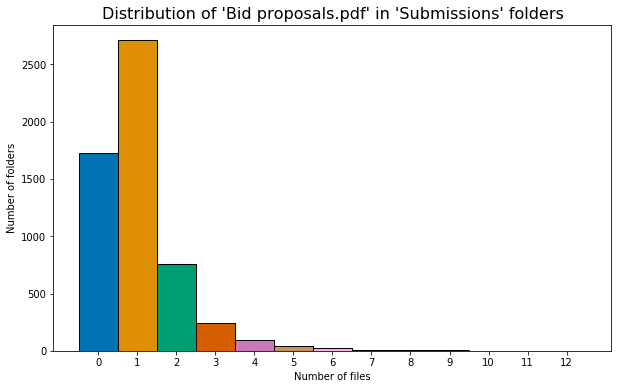

A total of 5617 Submissions folders within the directory on 2024-09-28

The distribution of files in those folders:
1722 folders with 0 Bid proposals.pdf
2711 folders with 1 Bid proposals.pdf
755 folders with 2 Bid proposals.pdf
241 folders with 3 Bid proposals.pdf
93 folders with 4 Bid proposals.pdf
46 folders with 5 Bid proposals.pdf
25 folders with 6 Bid proposals.pdf
10 folders with 7 Bid proposals.pdf
9 folders with 8 Bid proposals.pdf
3 folders with 9 Bid proposals.pdf
1 folders with 11 Bid proposals.pdf
1 folders with 12 Bid proposals.pdf


In [4]:
evaluator.distribution_of_files_in_folders()

### Display multiples of files in random folders

In [5]:
evaluator.show_files_in_random_folder(frequency=1)

Randomly selected folder with 1 Bid proposals.pdf: 

C:\Users\DCarlier\Oceaneering\Commercial Group - Eastern Hemisphere - Team Documents\BIDS\2022\OPG - Integrated Projects & Renewables\MID EAST\Saipem\2022-10004514 - Provision of CP Services\Submissions

2022-10004514 - Saipem - CP Services (4).pdf


## Searching for exact CL-pattern-matched Bid proposal.pdf files
### Pattern: "20XX-" "-" "Opportunity Number" "-" "Revision" "Anything.pdf"

In [6]:
file_pattern = re.compile(r"^20\d{2}-[a-zA-Z0-9]{6,8}-[a-zA-Z0-9]{3}.*\.pdf$", re.IGNORECASE)

# instantiate evaluator class
evaluator = FilesAndFoldersInDirectory( 
    directory_path=bids_directory,                           # travesrse entire directory
    folder_name=folder_name,                                 # find folders like this
    folder_pattern=folder_pattern,                           # folder pattern-matching
    file_name=file_name,                                     # find files like this
    pattern=file_pattern,                                    # file pattern-matching
    limit=10000)                                             # limit result to 10K

### Total count and 10 random file samples

In [7]:
evaluator.retrieve_pattern_matched_files()

A total of 2146 retrieved Bid proposals.pdf files from Submissions on 2024-09-28

Randomly selected samples:
2021-9980335-Technical Budgetary Proposal.pdf
2024-017449-001 - Dual Skid Rental - BP Murlach THOS Deployment.pdf
2021-4205975-Commercial Proposal.pdf
2023-10005741-003 Prelude Acid Shrouds.pdf
2021-2547748-Provision of Flush Unit- Angola.pdf
2023-011752-001.pdf
2024-016874-000 - RFQ 24142 SO 5146496 - Spares for Torque Tools.pdf
2022-010976-004 - Provision of  Blue View Units (7).pdf
2023-011571-001.pdf
2021-3030308-001 Provision of ROV Tooling.pdf


### Distribution of files in folders

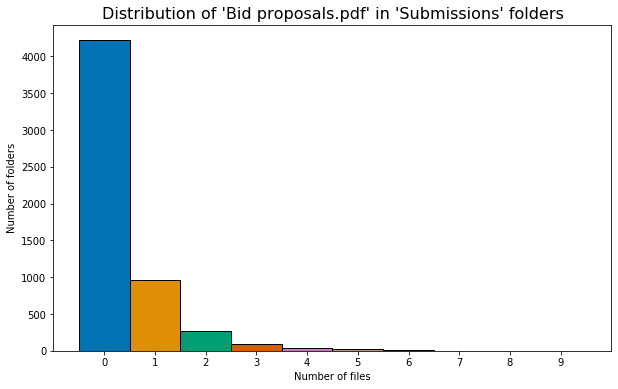

A total of 5617 Submissions folders within the directory on 2024-09-28

The distribution of files in those folders:
4220 folders with 0 Bid proposals.pdf
961 folders with 1 Bid proposals.pdf
269 folders with 2 Bid proposals.pdf
90 folders with 3 Bid proposals.pdf
39 folders with 4 Bid proposals.pdf
19 folders with 5 Bid proposals.pdf
12 folders with 6 Bid proposals.pdf
3 folders with 7 Bid proposals.pdf
3 folders with 8 Bid proposals.pdf
1 folders with 9 Bid proposals.pdf


In [8]:
evaluator.distribution_of_files_in_folders()

### Display multiples of files in random folders

In [9]:
evaluator.show_files_in_random_folder(frequency=1)

Randomly selected folder with 1 Bid proposals.pdf: 

C:\Users\DCarlier\Oceaneering\Commercial Group - Eastern Hemisphere - Team Documents\BIDS\2022\OPG - Engineered Solutions\NORWAY\Aker Solutions\2022-10004520-000 - Dalia, New ROV Tooling- Engineered Solutions\Submissions

2022-10004520-000 - Dalia, New ROV Tooling- Engineered Solutions (1).pdf


***
***
***

## Commercial Group - Western Hemisphere Bids Directory
### [Link to CG-WH directory where analysis performed](https://oceaneering.sharepoint.com/sites/ComGrpWest/Shared%20Documents/Forms/AllItems.aspx?FolderCTID=0x0120000CEF154AB187B644AD62E74C29B39E3B&id=%2Fsites%2FComGrpWest%2FShared%20Documents%2FOPG%2FBIDS&viewid=a55e7000%2Dccbd%2D4706%2D81a1%2D392733aaa391)

### Pattern: "20XX-" "Anything.pdf"

In [10]:
# set WH variables 
bids_directory = "C:\\Users\\DCarlier\\Oceaneering\\Commercial Group - Western Hemisphere - BIDS"
folder_pattern = re.compile(r"proposal", re.IGNORECASE)
file_pattern = re.compile(r"^20\d{2}-.*\.pdf$", re.IGNORECASE)

# instantiate evaluator class
evaluator = FilesAndFoldersInDirectory( 
    directory_path=bids_directory,                           # travesrse entire directory
    folder_name=folder_name,                                 # find folders like this
    folder_pattern=folder_pattern,                           # folder pattern-matching
    file_name=file_name,                                     # find files like this
    pattern=file_pattern,                                    # file pattern-matching
    limit=10000)                                             # limit result to 10K

### Total count and 10 random file samples

In [11]:
evaluator.retrieve_pattern_matched_files()

A total of 406 retrieved Bid proposals.pdf files from Submissions on 2024-09-28

Randomly selected samples:
2022-10003600 - OPG - Buckskin Quad install IDWR.pdf
2021-6236829-000 Eni Allegheny ROV Panel Rental Proposal.pdf
2021-4559332-000 Exxon Angola LWI (BUDGETARY).pdf
2022-10002532-001 BP BORIS PM&E Estimate.pdf
2019-4706809 - Well Head Cutting Services.pdf
2021-2269190B Hess IWOCS P&A Proposal.pdf
2022-10002247 Oceaneering OPG - Brazil - Shell T&T Project_Schedule_220629.pdf
2020-7105973 Kodiak 2 Tree Storage and Dock Testing Proposal.pdf
2023-10006749R2_ENI Umbilical Route Survey.pdf
2021-5424948-01 SBM Offshore Equatorial Guinea ASENG UWILD.pdf


### Distribution of files in folders

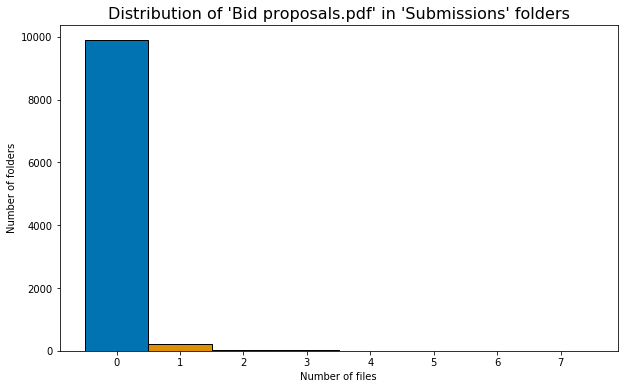

A total of 10177 Submissions folders within the directory on 2024-09-28

The distribution of files in those folders:
9891 folders with 0 Bid proposals.pdf
218 folders with 1 Bid proposals.pdf
41 folders with 2 Bid proposals.pdf
18 folders with 3 Bid proposals.pdf
1 folders with 4 Bid proposals.pdf
3 folders with 5 Bid proposals.pdf
2 folders with 6 Bid proposals.pdf
3 folders with 7 Bid proposals.pdf


In [12]:
evaluator.distribution_of_files_in_folders()

### Display multiples of files in random folders

In [13]:
evaluator.show_files_in_random_folder(frequency=1)

Randomly selected folder with 1 Bid proposals.pdf: 

C:\Users\DCarlier\Oceaneering\Commercial Group - Western Hemisphere - BIDS\Engineered Solutions\2022\Occidental Petroleum\2022-009744-000 - Oxy 3in Gasket RRT_hp\4. Proposal

2022-009744 OXY 3in GRRT draft.pdf


## Searching for exact CL-pattern-matched Bid proposal.pdf files
### Pattern: "20XX-" "-" "Opportunity Number" "-" "Revision" "Anything.pdf"

In [14]:
pattern = re.compile(r"^20\d{2}-[a-zA-Z0-9]{6,8}-[a-zA-Z0-9]{3}.*\.pdf$", re.IGNORECASE)

# instantiate evaluator class
evaluator = FilesAndFoldersInDirectory( 
    directory_path=bids_directory,                           # travesrse entire directory
    folder_name=folder_name,                                 # find folders like this
    folder_pattern=folder_pattern,                           # folder pattern-matching
    file_name=file_name,                                     # find files like this
    pattern=file_pattern,                                    # file pattern-matching
    limit=10000)                                             # limit result to 10K

### Total count and 10 random file samples

In [15]:
evaluator.retrieve_pattern_matched_files()

A total of 406 retrieved Bid proposals.pdf files from Submissions on 2024-09-28

Randomly selected samples:
2021-3208933 ENI Angola LWI (BUDGETARY) from Ian S..pdf
2022-10003856-000 Project Schedule.pdf
2021-5770739-000 WOM Umbilical Rental Proposal.pdf
2023-014538 Shell 20K Upgrade - Isolation Kit.pdf
2021-5863352-00-Saipem North Platte SCR Tie Ins.pdf
2023-10005786 Chevron 5deg Mag Inclinometer_final.pdf
2020-7515186 01 Oceaneering Proposal.pdf
2020-9140615 Ocean Patriot.pdf
2020-8765896-000 Chevron - 20K RWOCS Study - 1 Well Callout.pdf
2023-10006945-000 Shell Perdido Flexible Installation Project - TECHNICAL PROPOSAL.pdf


### Distribution of files in folders

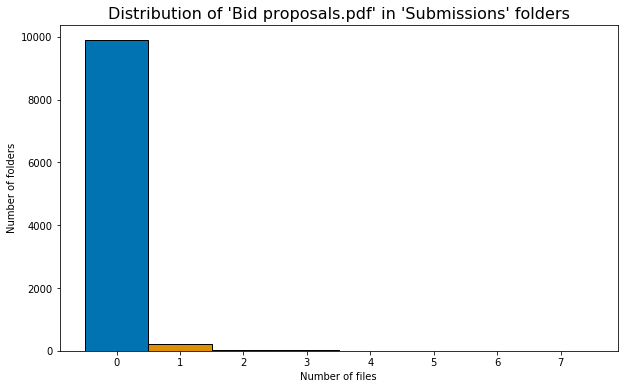

A total of 10177 Submissions folders within the directory on 2024-09-28

The distribution of files in those folders:
9891 folders with 0 Bid proposals.pdf
218 folders with 1 Bid proposals.pdf
41 folders with 2 Bid proposals.pdf
18 folders with 3 Bid proposals.pdf
1 folders with 4 Bid proposals.pdf
3 folders with 5 Bid proposals.pdf
2 folders with 6 Bid proposals.pdf
3 folders with 7 Bid proposals.pdf


In [16]:
evaluator.distribution_of_files_in_folders()

### Display multiples of files in random folders

In [17]:
evaluator.show_files_in_random_folder(frequency=4)

Randomly selected folder with 4 Bid proposals.pdf: 

C:\Users\DCarlier\Oceaneering\Commercial Group - Western Hemisphere - BIDS\Intervention\2023\Hess\2023-10006917-PSD6 Pipeline Flush & Fill\03_Proposal

2023-10006917-000 PSD6 Pipeline Flush  Fill - Rev 8-23.pdf
2023-10006917-001 PSD6 Pipeline Flush  Fill - Rev 8-30.pdf
2023-10006917-001 PSD6 Pipeline Flush  Fill - Rev 8-301.pdf
2023-10006917-003 PSD6 Pipeline Flush  Fill - Rev 9-26 signed.pdf
